In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, confusion_matrix
import numpy as np
from sklearn.pipeline import make_pipeline

In [22]:
crime_data = pd.read_csv('chicagocrimedata.csv', parse_dates=['Date'])
unemployment_data = pd.read_csv('unemploymentrate.csv') 
inflation_data = pd.read_csv('Inflation.csv')

crime_data['Month-Year'] = crime_data['Date'].dt.to_period('M')
crime_monthly = crime_data.groupby('Month-Year').size().reset_index(name='Crime Count')

crime_data['Month-Year'] = crime_data['Date'].dt.to_period('M')
arrested_crimes = crime_data[crime_data['Arrest'] == True]
crime_monthly = arrested_crimes.groupby('Month-Year').size().reset_index(name='Crime Count')

unemployment_data['Label'] = pd.to_datetime(unemployment_data['Label'])
unemployment_data['Month-Year'] = unemployment_data['Label'].dt.to_period('M')

inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'])
inflation_data['Month-Year'] = inflation_data['observation_date'].dt.to_period('M')

df = crime_monthly.merge(unemployment_data, on='Month-Year')


print("Downloaded")

Downloaded


C:\Users\Owner\AppData\Local\Temp\ipykernel_17520\1466216183.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unemployment_data['Label'] = pd.to_datetime(unemployment_data['Label'])


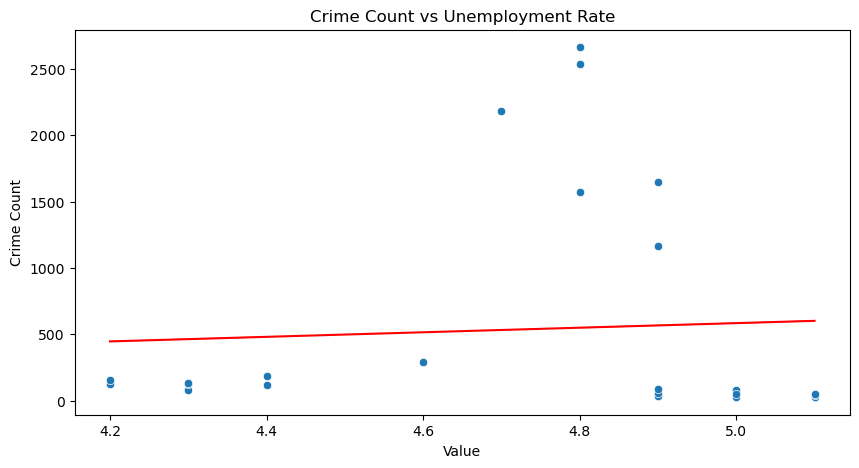

R^2 score: 0.0038


In [ ]:
df = crime_monthly.merge(unemployment_data, on='Month-Year')


# Simple Linear Regression
X = df[['Value']]
y = df['Crime Count']
lr = LinearRegression()
lr.fit(X, y)
df['Predicted'] = lr.predict(X)

# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Value', y='Crime Count', data=df)
sns.lineplot(x='Value', y='Predicted', data=df, color='red')
plt.title("Crime Count vs Unemployment Rate")
plt.show()

print(f"R^2 score: {lr.score(X, y):.4f}")

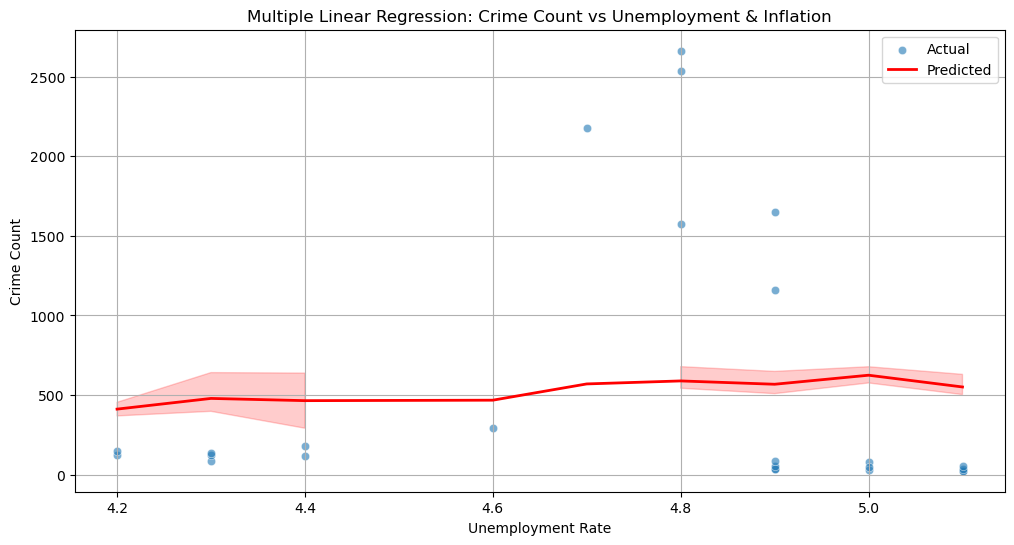

R^2 Score (Multiple Linear Regression): 0.0156
Mean Squared Error: 700135.68


In [27]:
# Prepare inflation data
inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'])
inflation_data['Month-Year'] = inflation_data['observation_date'].dt.to_period('M')
inflation_monthly = inflation_data[['Month-Year', 'inflation_value']].rename(columns={'inflation_value': 'Inflation Rate'})

# Rename unemployment column for clarity (already parsed above)
unemployment_monthly = unemployment_data[['Month-Year', 'Value']].rename(columns={'Value': 'Unemployment Rate'})

# Merge all datasets
df_multi = crime_monthly.merge(unemployment_monthly, on='Month-Year')
df_multi = df_multi.merge(inflation_monthly, on='Month-Year')

# Multiple Linear Regression
X_multi = df_multi[['Unemployment Rate', 'Inflation Rate']]
y_multi = df_multi['Crime Count']
multi_lr = LinearRegression()
multi_lr.fit(X_multi, y_multi)
df_multi['Predicted'] = multi_lr.predict(X_multi)

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unemployment Rate', y='Crime Count', data=df_multi, label='Actual', alpha=0.6)
sns.lineplot(x='Unemployment Rate', y='Predicted', data=df_multi, label='Predicted', color='red', linewidth=2)
plt.title("Multiple Linear Regression: Crime Count vs Unemployment & Inflation")
plt.xlabel("Unemployment Rate")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(True)
plt.show()

# "Confusion matrix"-style evaluation (regression version: show error matrix)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f"R^2 Score (Multiple Linear Regression): {r2_score(y_multi, df_multi['Predicted']):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_multi, df_multi['Predicted']):.2f}")

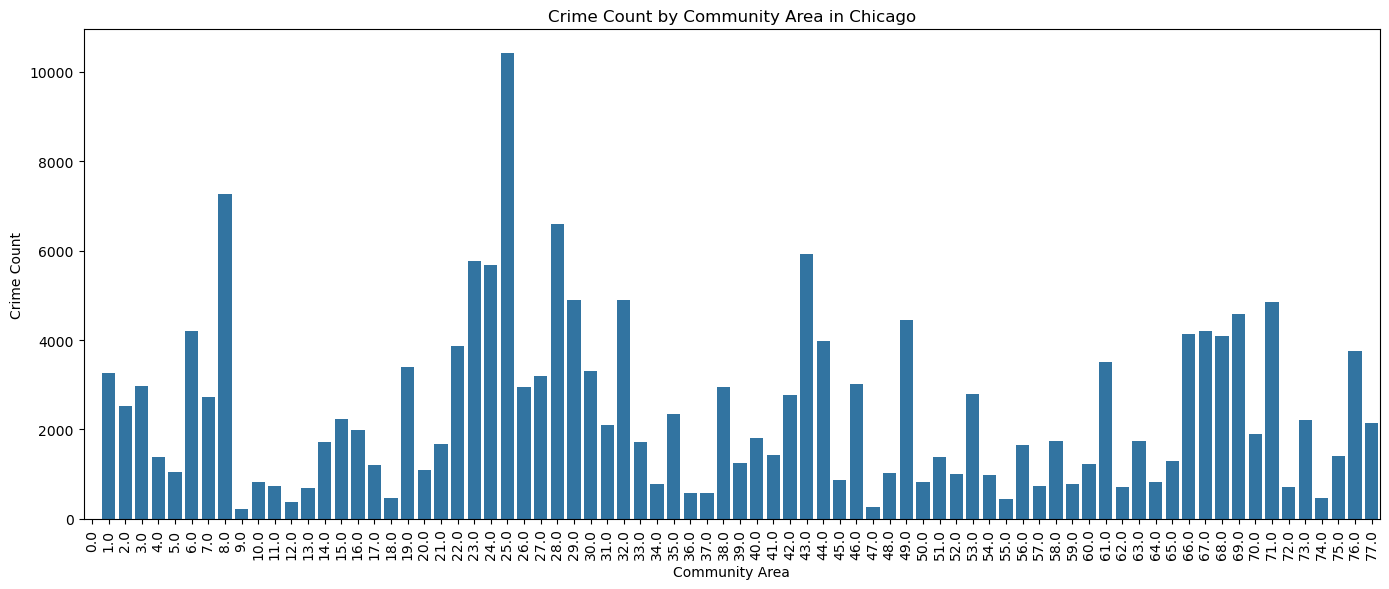

Top 5 Community Areas with Most Crime:
     Community Area  Crime Count
25            25.0        10432
8              8.0         7262
28            28.0         6587
43            43.0         5922
23            23.0         5770

Top 5 Community Areas with Least Crime:
     Community Area  Crime Count
0              0.0            2
9              9.0          228
47            47.0          261
12            12.0          368
55            55.0          438

Conclusion:
Crime counts vary significantly by community area, indicating that the community you live in
**does** impact the likelihood of being a victim of crime in Chicago.


In [28]:
# Step 1: Ensure 'Community Area' exists
if 'Community Area' in crime_data.columns:
    # Step 2: Count crimes per community area
    community_crime_counts = crime_data.groupby('Community Area').size().reset_index(name='Crime Count')

    # Step 3: Visualize crime count by community
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Community Area', y='Crime Count', data=community_crime_counts)
    plt.title("Crime Count by Community Area in Chicago")
    plt.xlabel("Community Area")
    plt.ylabel("Crime Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Step 4: Identify highest and lowest crime areas
    most_crime = community_crime_counts.sort_values(by='Crime Count', ascending=False).head(5)
    least_crime = community_crime_counts.sort_values(by='Crime Count').head(5)

    print("Top 5 Community Areas with Most Crime:\n", most_crime)
    print("\nTop 5 Community Areas with Least Crime:\n", least_crime)

    # Step 5: Conclusion
    print("\nConclusion:")
    print("Crime counts vary significantly by community area, indicating that the community you live in")
    print("**does** impact the likelihood of being a victim of crime in Chicago.")
else:
    print("Column 'Community Area' not found in the dataset. Unable to determine crime likelihood by community.")

c:\Users\Owner\anaconda3\envs\intropy_datascience\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Owner\anaconda3\envs\intropy_datascience\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Owner\anaconda3\envs\intropy_datascience\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


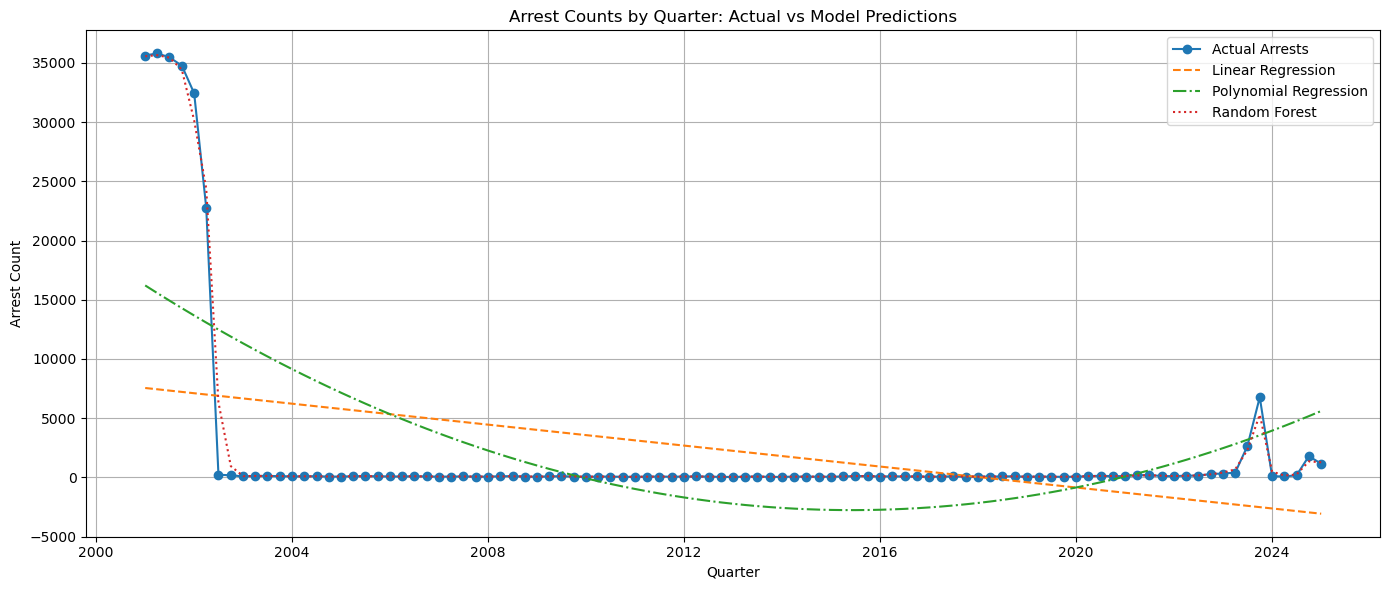

Predicted Arrest Count on Jan 1, 2026:
  Linear Regression: -3502
  Polynomial Regression: 7446
  Random Forest: 1278


In [31]:
crime_data = pd.read_csv('chicagocrimedata.csv', parse_dates=['Date'])

# Filter arrests
crime_data = crime_data[crime_data['Arrest'] == True].copy()

# Create Quarter-Year
crime_data['Quarter'] = crime_data['Date'].dt.to_period('Q')
arrest_quarterly = crime_data.groupby('Quarter').size().reset_index(name='Arrest Count')

# Convert Period to datetime for plotting and prediction
arrest_quarterly['Quarter_Start'] = arrest_quarterly['Quarter'].dt.start_time
arrest_quarterly['Timestamp'] = arrest_quarterly['Quarter_Start'].astype(np.int64) // 10**9  # Convert to seconds

# Prepare features
X = arrest_quarterly[['Timestamp']]
y = arrest_quarterly['Arrest Count']

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
arrest_quarterly['LR_Predicted'] = lr.predict(X)

# Polynomial Regression (degree=2)
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X, y)
arrest_quarterly['Poly_Predicted'] = poly_model.predict(X)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
arrest_quarterly['RF_Predicted'] = rf.predict(X)

# Predict for Jan 1, 2026
future_date = pd.Timestamp("2026-01-01")
future_ts = np.array([[future_date.value // 10**9]])

lr_pred = lr.predict(future_ts)[0]
poly_pred = poly_model.predict(future_ts)[0]
rf_pred = rf.predict(future_ts)[0]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(arrest_quarterly['Quarter_Start'], y, label='Actual Arrests', marker='o')
plt.plot(arrest_quarterly['Quarter_Start'], arrest_quarterly['LR_Predicted'], label='Linear Regression', linestyle='--')
plt.plot(arrest_quarterly['Quarter_Start'], arrest_quarterly['Poly_Predicted'], label='Polynomial Regression', linestyle='-.')
plt.plot(arrest_quarterly['Quarter_Start'], arrest_quarterly['RF_Predicted'], label='Random Forest', linestyle=':')
plt.title('Arrest Counts by Quarter: Actual vs Model Predictions')
plt.xlabel('Quarter')
plt.ylabel('Arrest Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Results
print(f"Predicted Arrest Count on Jan 1, 2026:")
print(f"  Linear Regression: {lr_pred:.0f}")
print(f"  Polynomial Regression: {poly_pred:.0f}")
print(f"  Random Forest: {rf_pred:.0f}")

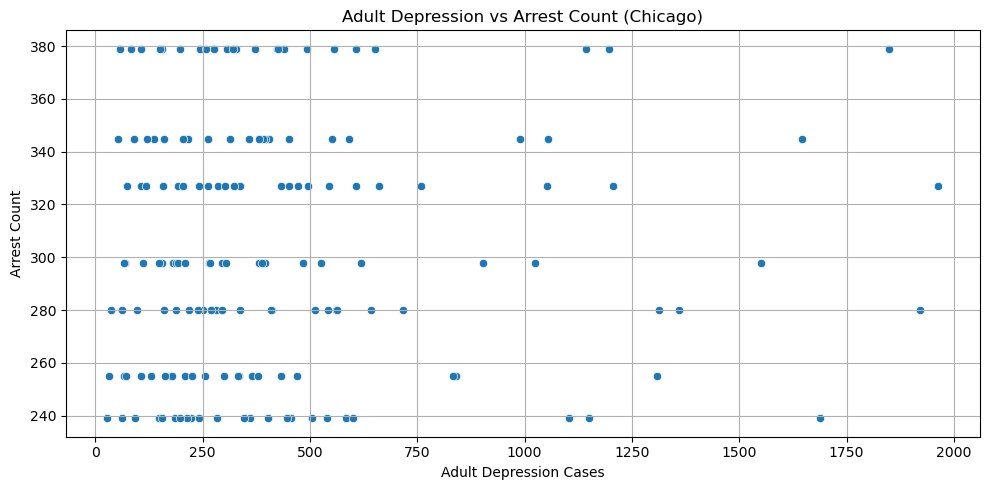

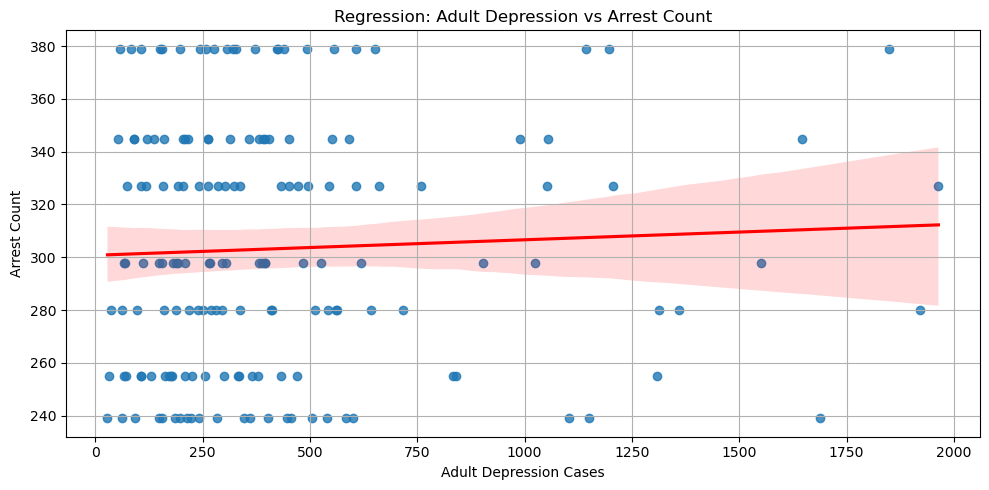

Pearson Correlation Coefficient: 0.0491
R² Score: 0.0024
Mean Squared Error: 2147.58
results suggest that there is no meaningful relationship between adult depression rates and crime rates (as measured by arrests) in the dataset. The low correlation, R² score, and high MSE all point to the conclusion that depression cases do not have a significant impact on the number of arrests


In [38]:
crime_data = pd.read_csv('chicagocrimedata.csv', parse_dates=['Date'])
depression_data = pd.read_csv('adult_depression.csv')
depression_data.columns = depression_data.columns.str.strip().str.lower()
# Filter for arrests only
crime_data = crime_data[crime_data['Arrest'] == True].copy()

# Prepare annual arrest count
crime_data['year'] = crime_data['Date'].dt.year
arrest_yearly = crime_data.groupby('Year').size().reset_index(name='Arrest Count')

# Prepare depression data
depression_data['year'] = depression_data['year'].astype(int)
depression_data = depression_data.rename(columns={'year': 'Year', 'frequency': 'Depression Cases'})

# Merge on Year
merged_df = pd.merge(arrest_yearly, depression_data, on='Year')

# Visualize relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Depression Cases', y='Arrest Count', data=merged_df)
plt.title('Adult Depression vs Arrest Count (Chicago)')
plt.xlabel('Adult Depression Cases')
plt.ylabel('Arrest Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression model
X = merged_df[['Depression Cases']]
y = merged_df['Arrest Count']
model = LinearRegression()
model.fit(X, y)
merged_df['Predicted Arrests'] = model.predict(X)

# Plot regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='Depression Cases', y='Arrest Count', data=merged_df, line_kws={'color': 'red'})
plt.title('Regression: Adult Depression vs Arrest Count')
plt.xlabel('Adult Depression Cases')
plt.ylabel('Arrest Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
corr = merged_df['Depression Cases'].corr(merged_df['Arrest Count'])
r2 = r2_score(y, merged_df['Predicted Arrests'])
mse = mean_squared_error(y, merged_df['Predicted Arrests'])

print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

print("results suggest that there is no meaningful relationship between adult depression rates and crime rates (as measured by arrests) in the dataset. The low correlation, R² score, and high MSE all point to the conclusion that depression cases do not have a significant impact on the number of arrests")